# Example of use

In [1]:
import LMIPy

In [2]:
LMIPy.__version__

'0.1'

## Dataset objects

Using known id's you can instantiate a dataset object directly.

In [3]:
ds = LMIPy.Dataset('044f4af8-be72-4999-b7dd-13434fc4a394')
ds

Dataset 044f4af8-be72-4999-b7dd-13434fc4a394

You can access the attributes of a dataset.

In [4]:
ds.attributes

{'name': 'Tree cover',
 'slug': 'Tree-cover',
 'type': None,
 'subtitle': None,
 'application': ['gfw', 'gfw-pro'],
 'dataPath': None,
 'attributesPath': None,
 'connectorType': 'rest',
 'provider': 'gee',
 'userId': '596cde70824315350dd0f116',
 'connectorUrl': None,
 'tableName': 'UMD/hansen/global_forest_change_2013',
 'status': 'saved',
 'published': True,
 'overwrite': False,
 'verified': False,
 'blockchain': {},
 'mainDateField': None,
 'env': 'production',
 'geoInfo': False,
 'protected': True,
 'legend': {'date': [], 'region': [], 'country': [], 'nested': []},
 'clonedHost': {},
 'errorMessage': '[Automatic Validation] ConnectorFailed -> Invalid Dataset',
 'taskId': None,
 'updatedAt': '2018-11-21T13:55:01.210Z',
 'dataLastUpdated': None,
 'widgetRelevantProps': [],
 'layerRelevantProps': []}

You can also access the metadata and vocabularies if they exist.

In [5]:
ds.vocabulary.attributes

{'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'tags': ['landCover'],
 'name': 'categoryTab',
 'application': 'gfw'}

In [6]:
ds.metadata.attributes

{'dataset': '044f4af8-be72-4999-b7dd-13434fc4a394',
 'application': 'gfw',
 'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'language': 'en',
 'info': {'citation': '2000/2010, Hansen/UMD/Google/USGS/NASA',
  'color': '#a0c746',
  'description': 'Identifies areas of tree cover.',
  'isSelectorLayer': True,
  'name': 'Tree cover'},
 'createdAt': '2018-08-03T10:17:06.249Z',
 'updatedAt': '2018-11-06T15:57:49.716Z',
 'status': 'published'}

## Queries on Datasets

Datasets can be queried via SQL, with a table returned. Currently this is only supported for Carto-type data:

In [7]:
d = LMIPy.Dataset(id_hash='bd5d7924-611e-4302-9185-8054acb0b44b')
d

Dataset bd5d7924-611e-4302-9185-8054acb0b44b

In [8]:
d.query('SELECT fid, ST_ASGEOJSON(the_geom_webmercator) FROM data LIMIT 5')

,fid,st_asgeojson
0,0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6998..."
1,62,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6927..."
2,343,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6996..."
3,402,"{""type"":""MultiPolygon"",""coordinates"":[[[[-7004..."
4,682,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6937..."


## Layer Objects

Similarly, you can also instantiate a Layer object.

In [9]:
ly = LMIPy.Layer(id_hash='dc6f6dd2-0718-4e41-81d2-109866bb9edd')
ly

Layer dc6f6dd2-0718-4e41-81d2-109866bb9edd

Layers can be visulized if appropriate via a call to Layer().map()

In [10]:
ly.map()

## Tables

Tables are subclasses of Dataset objects. They are document datasets which can be instantiated and queried returning a dataframe object.

In [11]:
t = LMIPy.Table(id_hash='86c7135a-855d-4f1b-9d67-f545a93281b3')
t

Table 86c7135a-855d-4f1b-9d67-f545a93281b3

In [12]:
df = t.head(3)
df

,City,Number_of_Days,_id
0,Beijing,14,AWILuq8j8Jqrt1rp-STQ
1,San Francisco,10,AWILuq8j8Jqrt1rp-STT
2,Manama,7,AWILuq8j8Jqrt1rp-STU


Queries to tables are returned in geopandas dataframe format.

In [13]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [14]:
t.query("SELECT * from data where City = 'San Francisco'")

,City,Number_of_Days,_id
0,San Francisco,10,AWILuq8j8Jqrt1rp-STT


## Collection objects: Searching

If you don't know what data you are interested in advance, you can search by keywords and return a list of objects.

In [15]:
c = LMIPy.Collection('tree cover', object_type=['layer','dataset'],app=['gfw'],limit=10)

[Table e663eb09-04de-4f39-b871-35c6c2ed10b5, Dataset 044f4af8-be72-4999-b7dd-13434fc4a394, Dataset 83f8365b-f40b-4b91-87d6-829425093da1, Dataset 897ecc76-2308-4c51-aeb3-495de0bdca79, Dataset 8d59a30f-9537-44ff-a6ca-29cf5c62a607, Dataset dddcba3c-f746-4787-9915-f24c141a94da, Dataset 746089a3-0c24-402f-81b6-f8d91fab77fe, Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2, Dataset 4316b45c-e744-4f4c-9823-142eb7638c8d, Dataset 588f2f1f-cc62-46aa-9859-befa031412ca, Dataset 70e2549c-d722-44a6-a8d7-4a385d78565e, Dataset 89755b9f-df05-4e22-a9bc-05217c8eafc8, Dataset 091cab6a-3a78-4015-a7b4-7a5d46ccf50b]


In [16]:
c

[Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2, Layer 220080ec-1641-489c-96c4-4885ed618bf3, Layer 2f4d9b87-6629-4658-8175-87d7892a5f32, Layer 66203fea-2e58-4a55-b222-1dae075cf95d, Layer dd5df87f-39c2-4aeb-a462-3ef969b20b66, Layer a8b4e2eb-328e-420b-8027-8466271d8368, Table e663eb09-04de-4f39-b871-35c6c2ed10b5, Dataset 746089a3-0c24-402f-81b6-f8d91fab77fe, Layer 2fe559f6-9ae7-4a47-87fb-a33a128652ed, Layer cfd95864-1e95-4a7f-bdf8-e47e4bb5815e]

Searching can be restricted with keyword arguments to specifically search types of items, applications, and more. If you want to render those items, you will need to do the following.

In [17]:
from IPython.display import display

In [18]:
for item in c:
    display(item)

Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2

Layer 220080ec-1641-489c-96c4-4885ed618bf3

Layer 2f4d9b87-6629-4658-8175-87d7892a5f32

Layer 66203fea-2e58-4a55-b222-1dae075cf95d

Layer dd5df87f-39c2-4aeb-a462-3ef969b20b66

Layer a8b4e2eb-328e-420b-8027-8466271d8368

Table e663eb09-04de-4f39-b871-35c6c2ed10b5

Dataset 746089a3-0c24-402f-81b6-f8d91fab77fe

Layer 2fe559f6-9ae7-4a47-87fb-a33a128652ed

Layer cfd95864-1e95-4a7f-bdf8-e47e4bb5815e

You can access items from a collection using subscripts, slices and more.

In [19]:
c[-1]

Layer cfd95864-1e95-4a7f-bdf8-e47e4bb5815e

In [20]:
c[-1].map()

## Create a Geometry object

Often you will need to perform some kind of intersect analysis between data held in datasets and tables and a geometry.
We will now show you multiple ways to create your geometry objects.

### From an ID

Vizzuality's API holds geometry objects as a Geostore item. Geostore items are accessed by an id-hash. If you know the hash of your object already you can simply call a geometry like so:

In [21]:
g = LMIPy.Geometry(id_hash='e8b6f974bcab5aefccd121654860be06')
g

Geometry e8b6f974bcab5aefccd121654860be06

In [22]:
g.attributes

{'geojson': {'features': [{'properties': None,
    'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-47.8535156249717, -4.19348629349041],
       [-49.6113281249728, -9.77447583284213],
       [-44.513671874972, -9.25438811084709],
       [-47.8535156249717, -4.19348629349041]]]}}],
  'crs': {},
  'type': 'FeatureCollection'},
 'hash': 'e8b6f974bcab5aefccd121654860be06',
 'provider': {},
 'areaHa': 16931274.241571266,
 'bbox': [-49.6113281249728,
  -9.77447583284213,
  -44.513671874972,
  -4.19348629349041],
 'lock': False,
 'info': {'use': {}}}

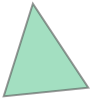

In [23]:
g.shape()[0]

In [24]:
g.map()

## Create a Geometry object from Geojson

Alternativley, you can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server).

In [25]:
atts={'geojson': {'type': 'FeatureCollection',
                  'features': [{'type': 'Feature',
                                'properties': {},
                                'geometry': {'type': 'Polygon',
                                             'coordinates': [[[110.21484375, -37.300275281344305],
                                               [131.3525390625, -37.300275281344305],
                                               [131.3525390625, -18.93746442964186],
                                               [110.21484375, -18.93746442964186],
                                               [110.21484375, -37.300275281344305]]]
                                            }
                               }]
                 }
     }

In [26]:
g1 = LMIPy.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
g1

Geometry 20d79720ccf8e04a044b25994ab8a06b

## Create a Geometry object from a Shapely object

Shapely objects are at the root of popular python geolibraries such as Geopandas. We can recieve those geometry objects and create a Geometry object (simultaneously registering it in a Vizzuality Geostore server).

In [27]:
import geopandas as gpd

In [28]:
%%writefile ./sample.geojson
{"features":[{"properties":null,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[-43.1343734264374,-8.07358087603511],[-43.1327533721924,-8.08277985402466],[-43.1298887729645,-8.08181322762719],[-43.1103515625,-8.07815914647929],[-43.1094932556152,-8.07799981079283],[-43.1094932556152,-8.09641859926744],[-43.1103515625,-8.09645046495416],[-43.1187307834625,-8.0967372560211],[-43.1186878681183,-8.10273857778317],[-43.1186771392822,-8.10358831522616],[-43.1476235389709,-8.10358831522616],[-43.1477630138397,-8.10273857778317],[-43.1505310535431,-8.08645513764317],[-43.1517112255096,-8.08057041885644],[-43.1439757347107,-8.0795931648273],[-43.1448876857758,-8.07574785969913],[-43.1343734264374,-8.07358087603511]]]}}],"crs":{},"type":"FeatureCollection"}

Overwriting ./sample.geojson


In [29]:
df = gpd.read_file('./sample.geojson')
df

,geometry
0,POLYGON ((-43.1343734264374 -8.073580876035111...


Hello! 👋 I am a <class 'shapely.geometry.polygon.Polygon'>


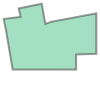

In [30]:
s = df.geometry[0]
print(f"Hello! 👋 I am a {type(s)}")
s

In [31]:
g = LMIPy.Geometry(s=s)

In [32]:
g

Geometry 52298e4ccc18b0f8375a156be6e18138

### Add a satellite image to the map
The Geometry().map() method supports the return of recent satellite imagery. We calculate the centroid of your geometry and return the best, most recent image that intersects with that point. This is simply to provide context to your geometry.

In [33]:
g.map(image=True)

Image taken 2019-02-11 13:12:41Z
Source: Sentinel-2A
id: COPERNICUS/S2/20190211T131241_20190211T131239_T23MPM


## Return Political Boundary Geometries

We are able to return political boundaries (based on [GADM](https://gadm.org/) data) using ISO, admin keys, down to admin-2 level. These should be passed in a dictionary to params. GADM 3.6 is currently used by default.

In [34]:
params={
    'iso': 'BRA',
    'adm1': None,
    'adm2': None
}
admin = LMIPy.Geometry(parameters=params)
admin.map()

## Create Admin geometry with an older GADM version 
Alternatively, you can specify a different gadm version.

In [35]:

params={
    'iso': 'BRA',
    'adm1': 1,
    'adm2': 1,
    'gadm': '2.7'
}
admin_v1 = LMIPy.Geometry(parameters=params)
admin_v1.map()

## Create Geometries from a Carto table and index

You can also return geometries directly from a Carto table (under the public WRI-01 account) using the table name and cartodb_id.


In [36]:
params={
    'table': 'gfw_logging',
    'id': 123
}
row_geom = LMIPy.Geometry(parameters=params)
row_geom.map(image=True)

Image taken 2019-02-06 02:49:09Z
Source: Sentinel-2B
id: COPERNICUS/S2/20190206T024909_20190206T030148_T49MDV


## Intersecting Raster data with Geometry objects

Any Layer or Dataset objects based on an Earth Engine raster can be intersected with LMIPy.Geometry objects.

### Dataset Intersections
In the first instance we show the result of an intersect between a geometry roughly bounding London, and a Population density layer.

In [37]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [
          [
            [
              -0.5712890625,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.28940590271679
            ]
          ]
        ]}}]}}

g = LMIPy.Geometry(attributes=atts)
g.map()

In [38]:
ds = LMIPy.Dataset(id_hash='a4e9c32d-d037-4c50-a893-967cad193537')
ds

Dataset a4e9c32d-d037-4c50-a893-967cad193537

Finally, you can call the intersect function on the dataset object to see a dictionary of values.

In [39]:
ds.intersect(geometry=g)

{'population-density': {'count': 138767,
  'max': 5984.53564453125,
  'mean': 1.5942131871343077,
  'min': 0.0,
  'stdev': 31.059972394495443,
  'sum': 221224.18133906648}}

### Layer Intersections

Intersections against layers work in the same manner. Here we show an intersect between an area along Brazil's coast and a Mangrove biomass density Layer.

In [40]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': 

[
          [
            [
              -52.16308593749999,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              -1.669685500986571
            ]
          ]
        ]
                 }}]}}

g = LMIPy.Geometry(attributes=atts)
g.map()

In [41]:
ly = LMIPy.Layer('3ef039ba-29c7-459d-aadd-66d6e6cc8f5e')
ly

Layer 3ef039ba-29c7-459d-aadd-66d6e6cc8f5e

In [42]:
ly.intersect(geometry=g)

{'b1': {'count': 135511,
  'max': 32.262001037597656,
  'mean': 2.341725882585996,
  'min': 0.5376999974250793,
  'stdev': 5.07816334797714,
  'sum': 302242.0047789522}}